<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,64.798454,-64.868724,9.929729,58.129290,-48.199561
1,0.0,1.0,28.823045,40.324740,79.147785,25.680684,53.467101
2,0.0,2.0,29.644204,-40.665608,-1.021404,26.421342,-27.442746
3,0.0,3.0,30.803105,-52.125476,-11.322371,27.466631,-38.789003
4,0.0,4.0,88.203000,-487.681315,-389.478315,79.239403,-468.717718
...,...,...,...,...,...,...,...
59995,999.0,55.0,98.939800,338.568220,447.508020,68.899430,378.608590
59996,999.0,56.0,98.676609,39.905129,148.581738,68.756002,79.825736
59997,999.0,57.0,91.148239,-90.727831,10.420408,64.653344,-54.232936
59998,999.0,58.0,82.360144,-57.629510,34.730633,59.864187,-25.133554


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,64.798454,-64.868724,9.929729,58.129290,-48.199561
1,0.0,1.0,28.823045,40.324740,79.147785,25.680684,53.467101
2,0.0,2.0,29.644204,-40.665608,-1.021404,26.421342,-27.442746
3,0.0,3.0,30.803105,-52.125476,-11.322371,27.466631,-38.789003
4,0.0,4.0,88.203000,-487.681315,-389.478315,79.239403,-468.717718
...,...,...,...,...,...,...,...
59995,999.0,55.0,98.939800,338.568220,447.508020,68.899430,378.608590
59996,999.0,56.0,98.676609,39.905129,148.581738,68.756002,79.825736
59997,999.0,57.0,91.148239,-90.727831,10.420408,64.653344,-54.232936
59998,999.0,58.0,82.360144,-57.629510,34.730633,59.864187,-25.133554


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1           e           Y      y_hat       e_hat
rep   index                                                          
0.0   0.0    64.798454  -64.868724    9.929729  58.129290  -48.199561
      1.0    28.823045   40.324740   79.147785  25.680684   53.467101
      2.0    29.644204  -40.665608   -1.021404  26.421342  -27.442746
      3.0    30.803105  -52.125476  -11.322371  27.466631  -38.789003
      4.0    88.203000 -487.681315 -389.478315  79.239403 -468.717718
...                ...         ...         ...        ...         ...
999.0 55.0   98.939800  338.568220  447.508020  68.899430  378.608590
      56.0   98.676609   39.905129  148.581738  68.756002   79.825736
      57.0   91.148239  -90.727831   10.420408  64.653344  -54.232936
      58.0   82.360144  -57.629510   34.730633  59.864187  -25.133554
      59.0   23.745868   47.905652   81.651520  27.921775   53.729746

[60000 rows x 5 columns]

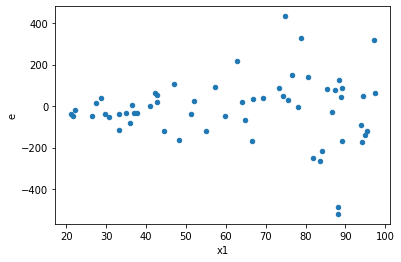

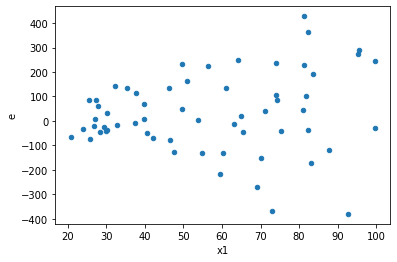

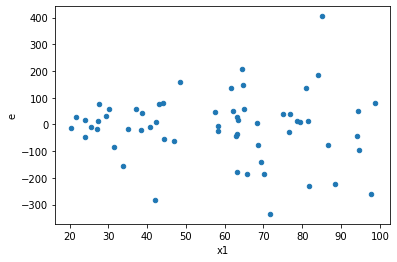

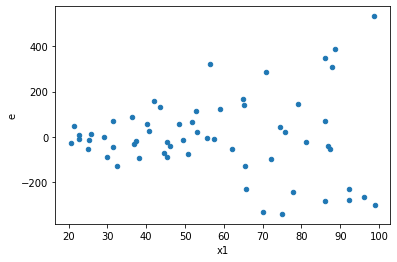

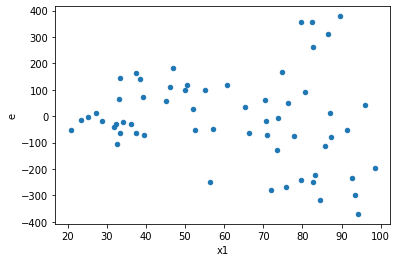

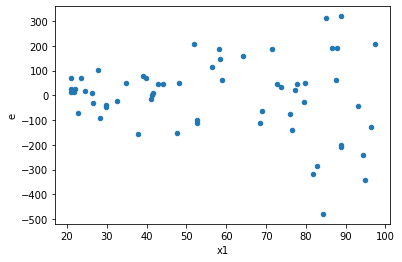

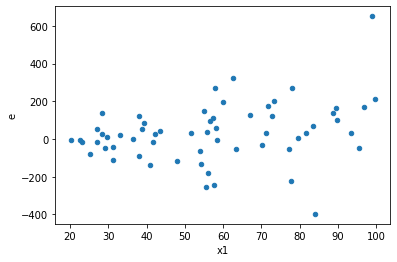

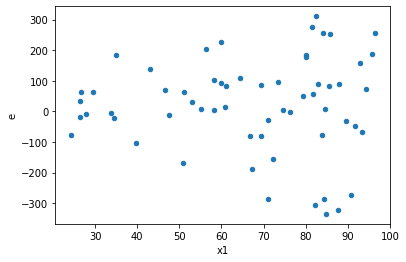

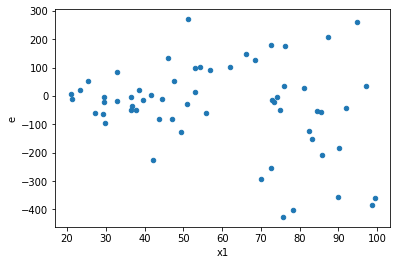

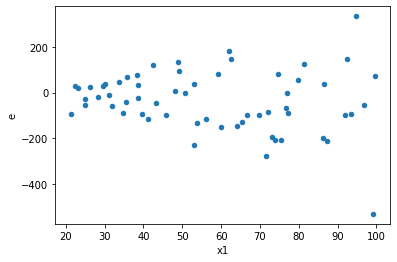

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,30.0,28.0,261433.40133829362,1167446.7685071463,8714.446711276454,41694.527446683795,4.784529509226474,7.670123121750194e-05,0.9999616493843912,3.835061560875097e-05,Reject001=0 : Heteroscedasticity
6.0,36.0,22.0,451456.2551497622,849957.0652332596,12540.451531937839,38634.412056057256,3.08078317257267,0.006925090476054718,0.9965374547619726,0.003462545238027359,Reject001=0 : Heteroscedasticity
7.0,23.0,35.0,181102.0982905782,1161505.2874750858,7874.0042735034,33185.86535643102,4.214611042072187,0.00013771331048606505,0.999931143344757,6.885665524303253e-05,Reject001=0 : Heteroscedasticity
8.0,31.0,27.0,231361.9154541402,1020079.6932964028,7463.287595294845,37780.729381348254,5.062210037995419,5.340079977922407e-05,0.9999732996001104,2.6700399889612036e-05,Reject001=0 : Heteroscedasticity
9.0,30.0,28.0,191796.31261514622,817589.9193374743,6393.210420504874,29199.639976338367,4.567289054445429,0.00011956779469546319,0.9999402161026523,5.9783897347731596e-05,Reject001=0 : Heteroscedasticity
10.0,27.0,31.0,251632.7374996798,660277.5320691147,9319.731018506658,21299.27522803596,2.28539591815911,0.027812790648438,0.986093604675781,0.013906395324219,Reject001=1 : Homoscedasticity
14.0,27.0,31.0,282546.247875359,1004282.1334202329,10464.67584723552,32396.197852265577,3.095766971207595,0.0028821545888200184,0.99855892270559,0.0014410772944100092,Reject001=0 : Heteroscedasticity
15.0,23.0,35.0,158567.5312877285,732923.4854915733,6894.240490770804,20940.671014044954,3.0374152224712576,0.0030165635619512354,0.9984917182190244,0.0015082817809756177,Reject001=0 : Heteroscedasticity
17.0,28.0,30.0,172630.48855580305,1744031.2187152258,6165.374591278681,58134.3739571742,9.429171430947441,2.7510681510634072e-08,0.9999999862446592,1.3755340755317036e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,32.0,26.0,1303289.3266798866,109473.98222017252,40727.791458746455,4210.537777698943,0.10338242332545416,1.1016752528817693e-08,Reject001=0 : Heteroscedasticity
1.0,30.0,28.0,261433.40133829362,1167446.7685071463,8714.446711276454,41694.527446683795,4.784529509226474,7.670123121750194e-05,Reject001=0 : Heteroscedasticity
2.0,35.0,23.0,743726.7584826441,175928.3504220903,21249.335956646974,7649.058714003926,0.35996695283135355,0.006295624047166232,Reject001=0 : Heteroscedasticity
3.0,25.0,33.0,1544672.5793383876,229167.54870524557,61786.9031735355,6944.471172886229,0.11239390252950365,3.2685012634712143e-07,Reject001=0 : Heteroscedasticity
4.0,31.0,27.0,1355089.7250858261,250026.40922148738,43712.57177696213,9260.237378573607,0.21184380150000776,5.733495268746406e-05,Reject001=0 : Heteroscedasticity
5.0,26.0,32.0,1072135.315890483,225587.061042937,41235.9736880955,7049.595657591782,0.17095741962865166,1.64585930453082e-05,Reject001=0 : Heteroscedasticity
6.0,36.0,22.0,451456.2551497622,849957.0652332596,12540.451531937839,38634.412056057256,3.08078317257267,0.006925090476054718,Reject001=0 : Heteroscedasticity
7.0,23.0,35.0,181102.0982905782,1161505.2874750858,7874.0042735034,33185.86535643102,4.214611042072187,0.00013771331048606505,Reject001=0 : Heteroscedasticity
8.0,31.0,27.0,231361.9154541402,1020079.6932964028,7463.287595294845,37780.729381348254,5.062210037995419,5.340079977922407e-05,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    886
Reject001=1 : Homoscedasticity      114
Name: Result_test, dtype: int64